<a href="https://colab.research.google.com/github/lutireh/DiabetesML/blob/main/DiabetesML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install ucimlrepo
!pip install scikit-learn-intelex
!pip install catboost
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
data = pd.read_csv("https://archive.ics.uci.edu/static/public/296/data.csv")

<ipython-input-2-b6ce30eb6a0c>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://archive.ics.uci.edu/static/public/296/data.csv")


Amostra de dados

In [3]:
data = data.sample(frac=0.6)

In [4]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,6.106000e+04,6.106000e+04,61060.000000,61060.000000,61060.000000,61060.000000,61060.000000,61060.000000,61060.000000,61060.000000,61060.000000,61060.000000,61060.000000
mean,1.649682e+08,5.432838e+07,2.025827,3.708434,5.760645,4.387946,43.033066,1.339256,16.018556,0.363282,0.198133,0.634098,7.416312
std,1.026162e+08,3.868404e+07,1.443818,5.274415,4.073360,2.977201,19.730721,1.706984,8.156487,1.243675,0.954362,1.248508,1.938893
min,1.573800e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496479e+07,2.341809e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.522819e+08,4.532222e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.296275e+08,8.775420e+07,3.000000,3.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438541e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,129.000000,6.000000,81.000000,38.000000,76.000000,16.000000,16.000000


# Analise exploratória

<Axes: ylabel='age'>

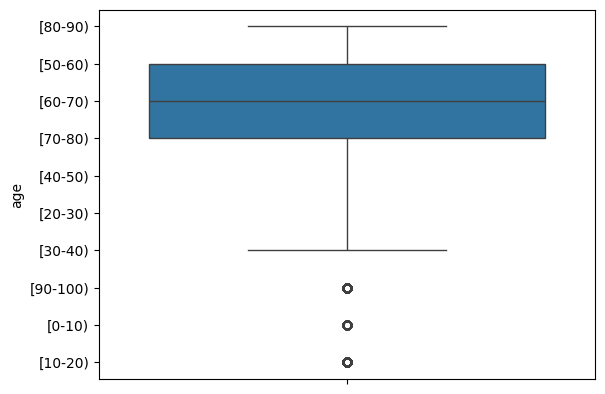

In [5]:
sns.boxplot(data.age)

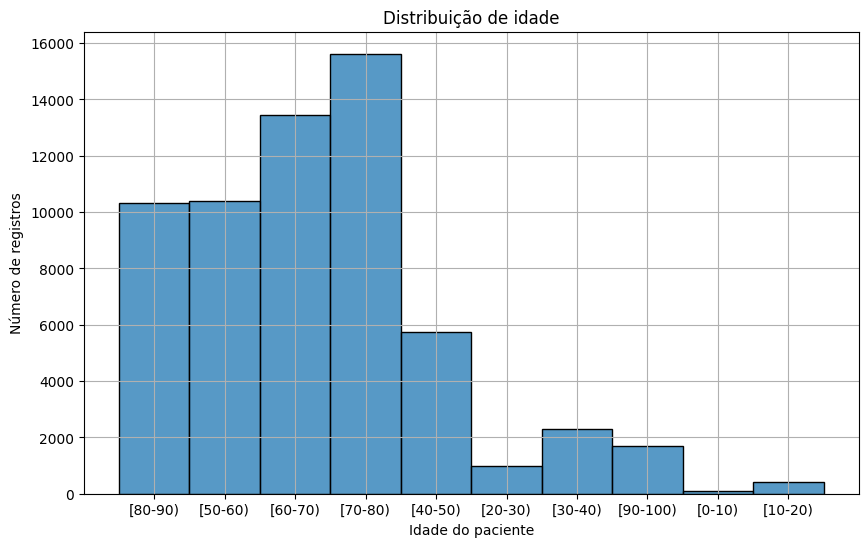

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data.age)
plt.title('Distribuição de idade')
plt.xlabel('Idade do paciente')
plt.ylabel('Número de registros')
plt.grid(True)

In [7]:
data.groupby('gender').mean(numeric_only=True)

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
gender,,,,,,,,,,,,,
Female,1.645235e+08,5.395471e+07,2.005294,3.820483,5.764011,4.470243,43.076645,1.242835,16.183990,0.375799,0.215511,0.647934,7.418396
Male,1.654868e+08,5.476213e+07,2.049766,3.578001,5.756846,4.292246,42.983790,1.451547,15.825837,0.348716,0.177887,0.618012,7.414089
Unknown/Invalid,1.627498e+08,8.060999e+07,2.000000,1.000000,4.000000,1.000000,21.500000,3.000000,14.000000,0.000000,0.000000,0.000000,4.500000


In [8]:
data.time_in_hospital.mean()

4.387946282345234

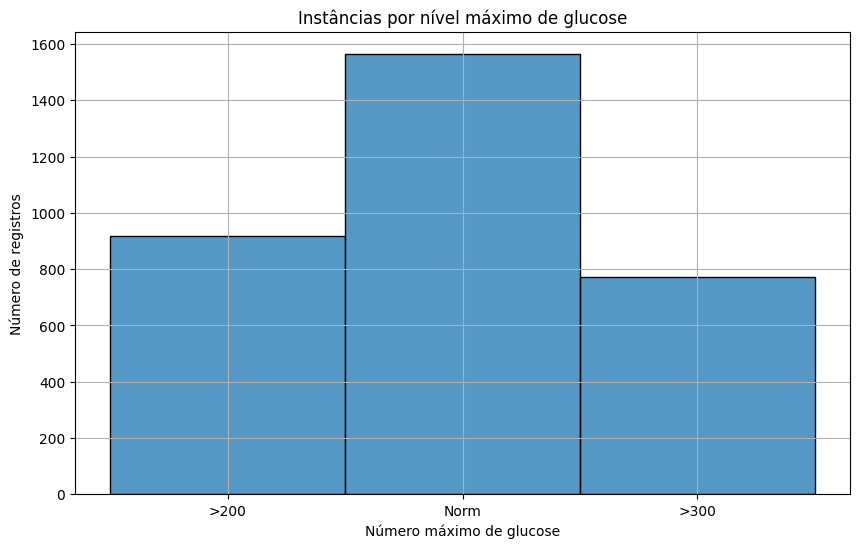

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data.max_glu_serum)
plt.title('Instâncias por nível máximo de glucose')
plt.xlabel('Número máximo de glucose')
plt.ylabel('Número de registros')
plt.grid(True)

<Axes: >

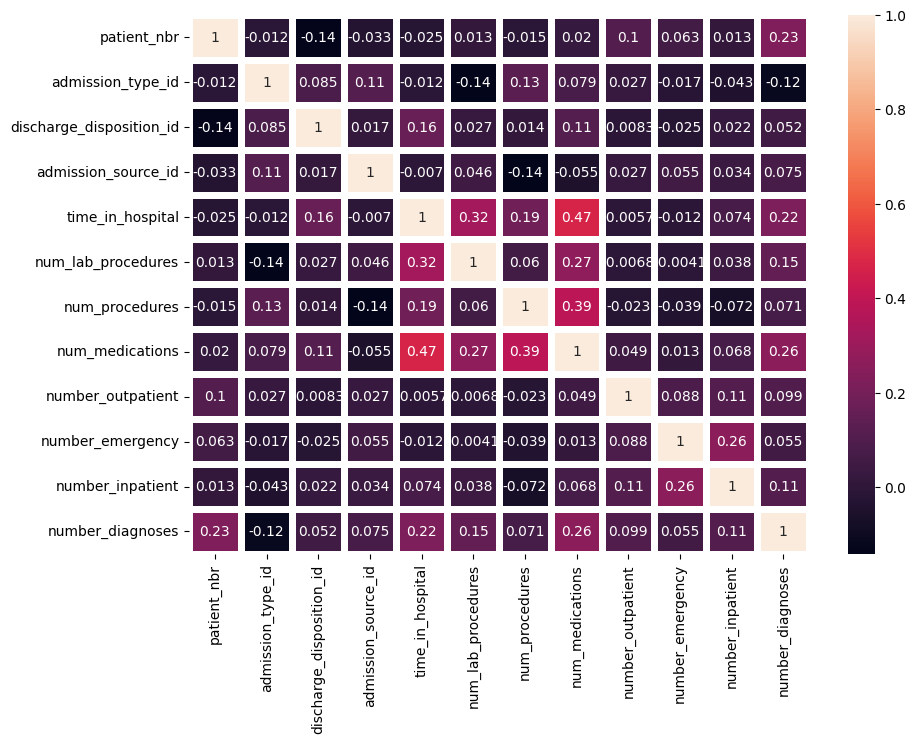

In [10]:
fig, ax = plt.subplots(figsize=(10,7))
data.corr(numeric_only=True)
data_without_id = data.drop(['encounter_id'], axis = 1)
sns.heatmap(data_without_id.corr(numeric_only=True), annot=True,  linewidths=5, ax = ax)

<ipython-input-11-299be24782b3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data.readmitted, y =data.age , palette='rainbow')


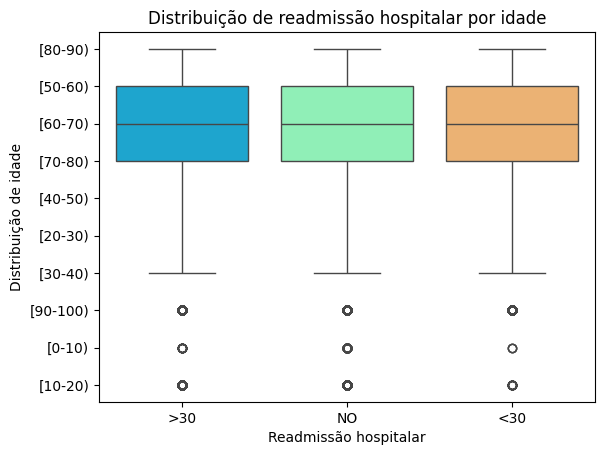

In [11]:
sns.boxplot(x=data.readmitted, y =data.age , palette='rainbow')
plt.title('Distribuição de readmissão hospitalar por idade')
plt.xlabel('Readmissão hospitalar')
plt.ylabel('Distribuição de idade')
plt.show()

Explorar relação dos medicamentos mais receitados
Explorar as features: number_outpatient, number_emergency e number_inpatient
Explorar o time_in_hospital

Text(0.5, 0, 'Distribuição de idade')

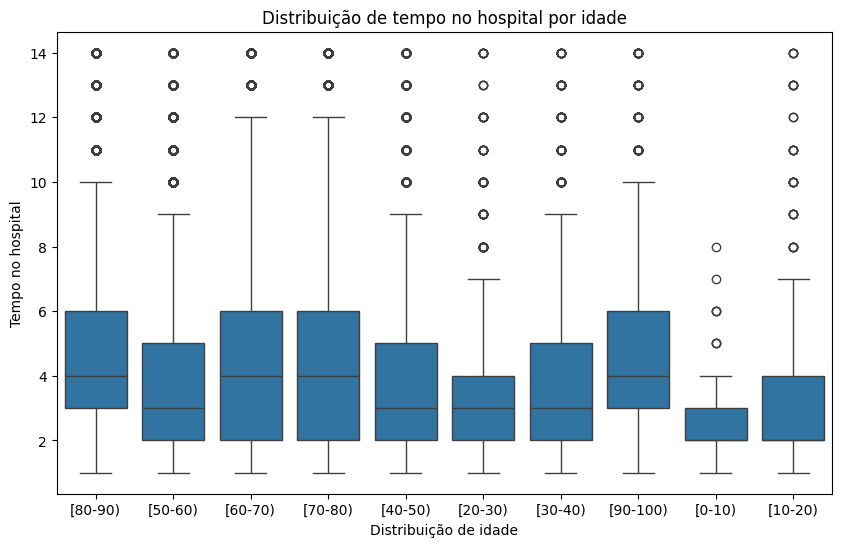

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = data, x = 'age', y = 'time_in_hospital')
plt.title('Distribuição de tempo no hospital por idade')
plt.ylabel('Tempo no hospital')
plt.xlabel('Distribuição de idade')

<Axes: xlabel='max_glu_serum', ylabel='age'>

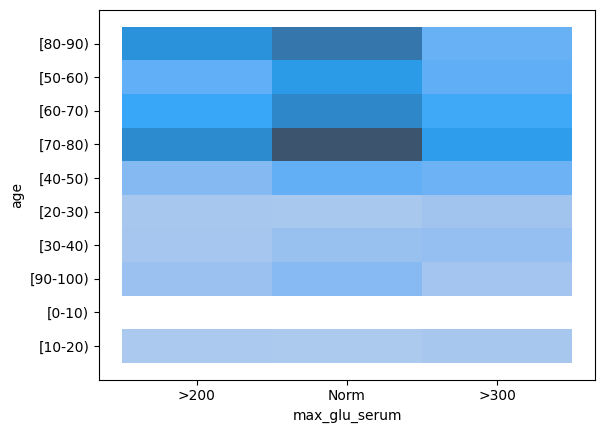

In [13]:
sns.histplot(data = data, x = 'max_glu_serum', y = 'age')

<Axes: xlabel='gender', ylabel='readmitted'>

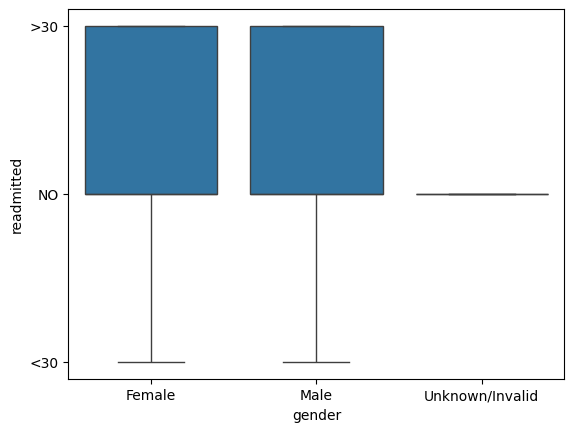

In [14]:
sns.boxplot(data= data, x= 'gender', y=  data.readmitted)

# Limpando os dados

In [15]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

matrix = encoder.fit_transform(data[['gender']]).toarray()
column_names = ["gender - Female","gender - Male", "gender - Unknown/Invalid"]

for i in range(len(matrix.T)):
  data[column_names[i]] = matrix.T[i]

matrix = encoder.fit_transform(data[['race']]).toarray()
column_names = ["race - Caucasian","race - AfricanAmerican", "race - NaN" ,"race - Other", "race - Asian","race - Hispanic"]

for i in range(len(matrix.T)):
  data[column_names[i]] = matrix.T[i]

matrix = encoder.fit_transform(data[['age']]).toarray()
column_names = ["age - [0-10)","age -[10-20)", "age -[20-30)" ,"age -[30-40)", "age -[40-50)","age -[50-60)","age -[60-70)","age -[70-80)","age -[80-90)","age -[90-100)"]

for i in range(len(matrix.T)):
  data[column_names[i]] = matrix.T[i]

matrix = encoder.fit_transform(data[['max_glu_serum']]).toarray()
column_names = ["max_glu_serum - >300","max_glu_serum - Norm", "max_glu_serum - >200" ,"max_glu_serum - NaN"]

for i in range(len(matrix.T)):
  data[column_names[i]] = matrix.T[i]

matrix = encoder.fit_transform(data[['A1Cresult']]).toarray()
column_names = ["A1Cresult - >7","A1Cresult - Norm", "A1Cresult - >8" ,"A1Cresult - NaN"]

for i in range(len(matrix.T)):
  data[column_names[i]] = matrix.T[i]

matrix = encoder.fit_transform(data[['metformin']]).toarray()
column_names = ["metformin - No","metformin - Steady", "metformin - Up" ,"metformin - Down"]

for i in range(len(matrix.T)):
  data[column_names[i]] = matrix.T[i]

matrix = encoder.fit_transform(data[['repaglinide']]).toarray()
column_names = ["repaglinide - No","repaglinide - Steady", "repaglinide - Up" ,"repaglinide - Down"]

for i in range(len(matrix.T)):
  data[column_names[i]] = matrix.T[i]

matrix = encoder.fit_transform(data[['nateglinide']]).toarray()
column_names = ["nateglinide - No","nateglinide - Steady", "nateglinide - Up" ,"nateglinide - Down"]

for i in range(len(matrix.T)):
  data[column_names[i]] = matrix.T[i]

matrix = encoder.fit_transform(data[['chlorpropamide']]).toarray()
column_names = ["chlorpropamide - No","chlorpropamide - Steady", "chlorpropamide - Up" ,"chlorpropamide - Down"]

for i in range(len(matrix.T)):
  data[column_names[i]] = matrix.T[i]

matrix = encoder.fit_transform(data[['glimepiride']]).toarray()
column_names = ["glimepiride - No","glimepiride - Steady", "glimepiride - Up" ,"glimepiride - Down"]

for i in range(len(matrix.T)):
  data[column_names[i]] = matrix.T[i]

matrix = encoder.fit_transform(data[['acetohexamide']]).toarray()
column_names = ["acetohexamide - No","acetohexamide - Steady", "acetohexamide - Up" ,"acetohexamide - Down"]

for i in range(len(matrix.T)):
  data[column_names[i]] = matrix.T[i]

matrix = encoder.fit_transform(data[['glipizide']]).toarray()
column_names = ["glipizide - No","glipizide - Steady", "glipizide - Up" ,"glipizide - Down"]

for i in range(len(matrix.T)):
  data[column_names[i]] = matrix.T[i]

matrix = encoder.fit_transform(data[['glyburide']]).toarray()
column_names = ["glyburide - No","glyburide - Steady", "glyburide - Up" ,"glyburide - Down"]

for i in range(len(matrix.T)):
  data[column_names[i]] = matrix.T[i]

matrix = encoder.fit_transform(data[['tolbutamide']]).toarray()
column_names = ["tolbutamide - No","tolbutamide - Steady", "tolbutamide - Up" ,"tolbutamide - Down"]

for i in range(len(matrix.T)):
  data[column_names[i]] = matrix.T[i]

matrix = encoder.fit_transform(data[['pioglitazone']]).toarray()
column_names = ["pioglitazone - No","pioglitazone - Steady", "pioglitazone - Up" ,"pioglitazone - Down"]

for i in range(len(matrix.T)):
  data[column_names[i]] = matrix.T[i]

matrix = encoder.fit_transform(data[['rosiglitazone']]).toarray()
column_names = ["rosiglitazone - No","rosiglitazone - Steady", "rosiglitazone - Up" ,"rosiglitazone - Down"]

for i in range(len(matrix.T)):
  data[column_names[i]] = matrix.T[i]

matrix = encoder.fit_transform(data[['acarbose']]).toarray()
column_names = ["acarbose - No","acarbose - Steady", "acarbose - Up" ,"acarbose - Down"]

for i in range(len(matrix.T)):
  data[column_names[i]] = matrix.T[i]

matrix = encoder.fit_transform(data[['miglitol']]).toarray()
column_names = ["miglitol - No","miglitol - Steady", "miglitol - Up" ,"miglitol - Down"]

for i in range(len(matrix.T)):
  data[column_names[i]] = matrix.T[i]

matrix = encoder.fit_transform(data[['troglitazone']]).toarray()
column_names = ["troglitazone - No","troglitazone - Steady", "troglitazone - Up" ,"troglitazone - Down"]

for i in range(len(matrix.T)):
  data[column_names[i]] = matrix.T[i]

matrix = encoder.fit_transform(data[['tolazamide']]).toarray()
column_names = ["tolazamide - No","tolazamide - Steady", "tolazamide - Up" ,"tolazamide - Down"]

for i in range(len(matrix.T)):
  data[column_names[i]] = matrix.T[i]

matrix = encoder.fit_transform(data[['examide']]).toarray()
column_names = ["examide - No","examide - Steady", "examide - Up" ,"examide - Down"]

for i in range(len(matrix.T)):
  data[column_names[i]] = matrix.T[i]

matrix = encoder.fit_transform(data[['citoglipton']]).toarray()
column_names = ["citoglipton - No","citoglipton - Steady", "citoglipton - Up" ,"citoglipton - Down"]

for i in range(len(matrix.T)):
  data[column_names[i]] = matrix.T[i]

matrix = encoder.fit_transform(data[['insulin']]).toarray()
column_names = ["insulin - No","insulin - Steady", "insulin - Up" ,"insulin - Down"]

for i in range(len(matrix.T)):
  data[column_names[i]] = matrix.T[i]

matrix = encoder.fit_transform(data[['glyburide-metformin']]).toarray()
column_names = ["glyburide-metformin - No","glyburide-metformin - Steady", "glyburide-metformin - Up" ,"glyburide-metformin - Down"]

for i in range(len(matrix.T)):
  data[column_names[i]] = matrix.T[i]

matrix = encoder.fit_transform(data[['glipizide-metformin']]).toarray()
column_names = ["glipizide-metformin - No","glipizide-metformin - Steady", "glipizide-metformin - Up" ,"glipizide-metformin - Down"]

for i in range(len(matrix.T)):
  data[column_names[i]] = matrix.T[i]

matrix = encoder.fit_transform(data[['glimepiride-pioglitazone']]).toarray()
column_names = ["glimepiride-pioglitazone - No","glimepiride-pioglitazone - Steady", "glimepiride-pioglitazone - Up" ,"glimepiride-pioglitazone - Down"]

for i in range(len(matrix.T)):
  data[column_names[i]] = matrix.T[i]

matrix = encoder.fit_transform(data[['metformin-rosiglitazone']]).toarray()
column_names = ["metformin-rosiglitazone - No","metformin-rosiglitazone - Steady", "metformin-rosiglitazone - Up" ,"metformin-rosiglitazone - Down"]

for i in range(len(matrix.T)):
  data[column_names[i]] = matrix.T[i]

matrix = encoder.fit_transform(data[['metformin-pioglitazone']]).toarray()
column_names = ["Metformin-pioglitazone - No","metformin-pioglitazone - Steady", "metformin-pioglitazone - Up" ,"metformin-pioglitazone - Down"]

for i in range(len(matrix.T)):
  data[column_names[i]] = matrix.T[i]

matrix = encoder.fit_transform(data[['diabetesMed']]).toarray()
column_names = ["diabetesMed - No","diabetesMed - Yes"]

for i in range(len(matrix.T)):
  data[column_names[i]] = matrix.T[i]

matrix = encoder.fit_transform(data[['change']]).toarray()
column_names = ["change - No","change - Ch"]

for i in range(len(matrix.T)):
  data[column_names[i]] = matrix.T[i]

Convertendo multi-classe para binário

In [16]:
data['readmitted_binary'] = data['readmitted'].map({'NO': 0, '>30': 1, '<30': 1})
data['readmitted'] = data['readmitted_binary']
data.drop('readmitted_binary', axis=1, inplace=True)

<ipython-input-16-b8d656f57399>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['readmitted_binary'] = data['readmitted'].map({'NO': 0, '>30': 1, '<30': 1})


In [17]:
data.drop('payer_code', axis = 1, inplace=True)
data.drop('diag_1', axis = 1, inplace=True)
data.drop('diag_2', axis = 1, inplace=True)
data.drop('diag_3', axis = 1, inplace=True)
data.drop('change', axis = 1, inplace=True)
data.drop('patient_nbr', axis = 1, inplace=True)
data.drop('admission_type_id', axis = 1, inplace=True)
data.drop('discharge_disposition_id', axis = 1, inplace=True)
data.drop('admission_source_id', axis = 1, inplace=True)
data.drop('gender', axis = 1, inplace=True)
data.drop('weight', axis = 1, inplace=True)
data.drop('race', axis = 1, inplace=True)
data.drop('age', axis = 1, inplace=True)
data.drop('max_glu_serum', axis = 1, inplace=True)
data.drop('A1Cresult', axis = 1, inplace=True)
data.drop('metformin', axis = 1, inplace=True)
data.drop('repaglinide', axis = 1, inplace=True)
data.drop('nateglinide', axis = 1, inplace=True)
data.drop('chlorpropamide', axis = 1, inplace=True)
data.drop('glimepiride', axis = 1, inplace=True)
data.drop('acetohexamide', axis = 1, inplace=True)
data.drop('glipizide', axis = 1, inplace=True)
data.drop('glyburide', axis = 1, inplace=True)
data.drop('tolbutamide', axis = 1, inplace=True)
data.drop('pioglitazone', axis = 1, inplace=True)
data.drop('rosiglitazone', axis = 1, inplace=True)
data.drop('acarbose', axis = 1, inplace=True)
data.drop('miglitol', axis = 1, inplace=True)
data.drop('troglitazone', axis = 1, inplace=True)
data.drop('tolazamide', axis = 1, inplace=True)
data.drop('examide', axis = 1, inplace=True)
data.drop('citoglipton', axis = 1, inplace=True)
data.drop('insulin', axis = 1, inplace=True)
data.drop('glyburide-metformin', axis = 1, inplace=True)
data.drop('glipizide-metformin', axis = 1, inplace=True)
data.drop('glimepiride-pioglitazone', axis = 1, inplace=True)
data.drop('metformin-rosiglitazone', axis = 1, inplace=True)
data.drop('metformin-pioglitazone', axis = 1, inplace=True)
data.drop('medical_specialty', axis = 1, inplace=True)
data.drop('diabetesMed', axis = 1, inplace=True)

In [18]:
data.shape

(61060, 108)

In [19]:
data.columns

Index(['encounter_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'readmitted',
       ...
       'glipizide-metformin - Steady', 'glimepiride-pioglitazone - No',
       'glimepiride-pioglitazone - Steady', 'metformin-rosiglitazone - No',
       'Metformin-pioglitazone - No', 'metformin-pioglitazone - Steady',
       'diabetesMed - No', 'diabetesMed - Yes', 'change - No', 'change - Ch'],
      dtype='object', length=108)

Listar atributos com maior correlação com a classe:

In [20]:
mostCorr = data[data.columns[1:]].corr()['readmitted'].sort_values(ascending=False)[:15]
mostCorr

,readmitted
readmitted,1.000000
number_inpatient,0.218785
number_diagnoses,0.110551
number_emergency,0.101565
number_outpatient,0.081254
diabetesMed - Yes,0.055994
insulin - No,0.051946
time_in_hospital,0.048020
change - No,0.044619
num_medications,0.044608


In [21]:
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, recall_score

In [22]:
X = data.drop('readmitted', axis=1)
y = data.readmitted

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Decision Tree

0.6150234741784038
0.6150234741784038
0.6179168031444481
0.6207009498853586
0.622720821050333
0.6229937766131673
0.623594278851403
0.6225024566000655
0.6214652254612949
0.618790260945518


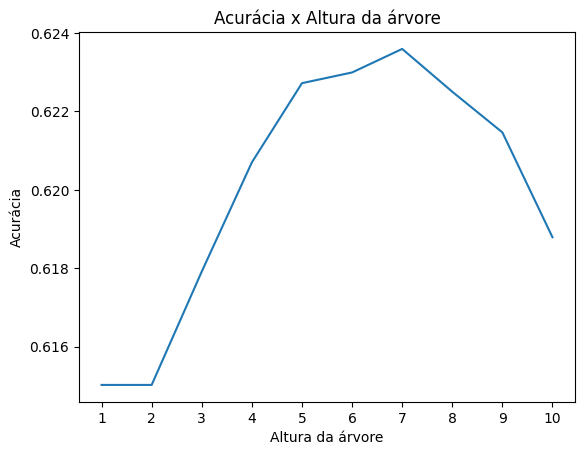

In [24]:
from sklearn.tree import DecisionTreeClassifier

# Decision tree - Different max_depth
depth = range(1,11)
acc = []

# Train a decision tree
for i in range(1, 11):
    dt = DecisionTreeClassifier(max_depth=i)
    dt_model = dt.fit(X_train, y_train)
    acc.append(dt_model.score(X_test, y_test))
    print(dt_model.score(X_test, y_test))

# Accuracy of decision trees
plt.plot(list(depth), acc)
plt.xlabel('Altura da árvore')
plt.xticks(range(1, 11))
plt.ylabel('Acurácia')
plt.title('Acurácia x Altura da árvore')
plt.show()

In [25]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)
dt_model = dt.fit(X_train, y_train)

Text(0.5, 23.52222222222222, 'Predito')

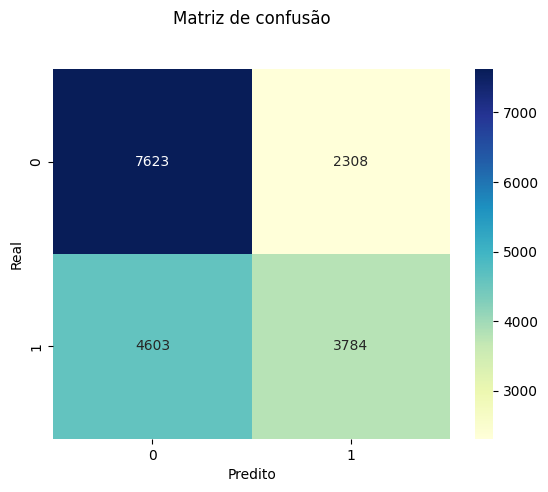

In [26]:
import seaborn as sns
from sklearn import metrics

y_pred = dt_model.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Matriz de confusão', y=1.1)
plt.ylabel('Real')
plt.xlabel('Predito')

In [27]:
recall = recall_score(y_test, y_pred)
print(f"Recall do modelo DecisionTree: {recall:.2%}")

precisao = precision_score(y_test, y_pred)
print(f"Precisão do modelo DecisionTree: {precisao:.2%}")

acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo DecisionTree: {acuracia:.2%}")

f1Score = f1_score(y_test, y_pred)
print(f"F1-Score do modelo DecisionTree: {f1Score:.2%}")

roc_auc = roc_auc_score(y_test,y_pred)
print(f"AUC-ROC do modelo DecisionTree: {roc_auc:.2%}")


Recall do modelo DecisionTree: 45.12%
Precisão do modelo DecisionTree: 62.11%
Acurácia do modelo DecisionTree: 62.27%
F1-Score do modelo DecisionTree: 52.27%
AUC-ROC do modelo DecisionTree: 60.94%


# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [29]:
recall = recall_score(y_test, y_pred)
print(f"Recall do modelo RandomForest: {recall:.2%}")

precisao = precision_score(y_test, y_pred)
print(f"Precisão do modelo RandomForest: {precisao:.2%}")

acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo RandomForest: {acuracia:.2%}")

f1Score = f1_score(y_test, y_pred)
print(f"F1-Score do modelo RandomForest: {f1Score:.2%}")

roc_auc = roc_auc_score(y_test,y_pred)
print(f"AUC-ROC do modelo RandomForest: {roc_auc:.2%}")


Recall do modelo RandomForest: 50.09%
Precisão do modelo RandomForest: 61.52%
Acurácia do modelo RandomForest: 62.80%
F1-Score do modelo RandomForest: 55.22%
AUC-ROC do modelo RandomForest: 61.81%


# AdaBoost Classifier

In [30]:
from sklearn.ensemble import AdaBoostClassifier

acc_ada = [] # Stores the accuracy score of AdaBoost
for lr in np.arange(0.1, 3, 0.1):
    ada = AdaBoostClassifier(learning_rate=lr, n_estimators=100)
    ada_model = ada.fit(X_train, y_train)
    acc_ada.append(ada.score(X_test, y_test))

y_pred = ada_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

In [31]:
recall = recall_score(y_test, y_pred)
print(f"Recall do modelo AdaBoost: {recall:.2%}")

precisao = precision_score(y_test, y_pred)
print(f"Precisão do modelo AdaBoost: {precisao:.2%}")

acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo AdaBoost: {acuracia:.2%}")

f1Score = f1_score(y_test, y_pred)
print(f"F1-Score do modelo AdaBoost: {f1Score:.2%}")

roc_auc = roc_auc_score(y_test,y_pred)
print(f"AUC-ROC do modelo AdaBoost: {roc_auc:.2%}")

Recall do modelo AdaBoost: 43.57%
Precisão do modelo AdaBoost: 61.18%
Acurácia do modelo AdaBoost: 61.50%
F1-Score do modelo AdaBoost: 50.89%
AUC-ROC do modelo AdaBoost: 60.11%


# Gradient Boosting Classifier

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient boosting
test_gb = []
train_gb = []
for lr in np.arange(0.1, 2, 0.1):
    gb= GradientBoostingClassifier(learning_rate=lr, n_estimators=100)
    gb_model = gb.fit(X_train, y_train)
    train_gb.append(gb.score(X_train, y_train))
    test_gb.append(gb.score(X_test, y_test))

y_pred = gb_model.predict(X_test)


In [33]:
recall = recall_score(y_test, y_pred)
print(f"Recall do modelo Gradient boosting: {recall:.2%}")

precisao = precision_score(y_test, y_pred)
print(f"Precisão do modelo Gradient boosting: {precisao:.2%}")

acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo Gradient boosting: {acuracia:.2%}")

f1Score = f1_score(y_test, y_pred)
print(f"F1-Score do modelo Gradient boosting: {f1Score:.2%}")

roc_auc = roc_auc_score(y_test,y_pred)
print(f"AUC-ROC do modelo Gradient boosting: {roc_auc:.2%}")

Recall do modelo Gradient boosting: 43.77%
Precisão do modelo Gradient boosting: 58.16%
Acurácia do modelo Gradient boosting: 59.84%
F1-Score do modelo Gradient boosting: 49.95%
AUC-ROC do modelo Gradient boosting: 58.59%


# SVM

Normalização dos atributos

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [35]:
from sklearn.svm import SVC

svm = SVC(random_state = 42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

In [36]:
recall = recall_score(y_test, y_pred)
print(f"Recall do modelo SVM: {recall:.2%}")

precisao = precision_score(y_test, y_pred)
print(f"Precisão do modelo SVM: {precisao:.2%}")

acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo SVM: {acuracia:.2%}")

f1Score = f1_score(y_test, y_pred)
print(f"F1-Score do modelo SVM: {f1Score:.2%}")

roc_auc = roc_auc_score(y_test,y_pred)
print(f"AUC-ROC do modelo SVM: {roc_auc:.2%}")

Recall do modelo SVM: 31.42%
Precisão do modelo SVM: 67.31%
Acurácia do modelo SVM: 61.61%
F1-Score do modelo SVM: 42.84%
AUC-ROC do modelo SVM: 59.26%


# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1.0, solver='lbfgs', multi_class='ovr')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
recall = recall_score(y_test, y_pred)
print(f"Recall do modelo LogisticRegression: {recall:.2%}")

precisao = precision_score(y_test, y_pred)
print(f"Precisão do modelo LogisticRegression: {precisao:.2%}")

acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo LogisticRegression: {acuracia:.2%}")

f1Score = f1_score(y_test, y_pred)
print(f"F1-Score do modelo LogisticRegression: {f1Score:.2%}")

roc_auc = roc_auc_score(y_test,y_pred)
print(f"AUC-ROC do modelo LogisticRegression: {roc_auc:.2%}")

Recall do modelo LogisticRegression: 40.87%
Precisão do modelo LogisticRegression: 62.60%
Acurácia do modelo LogisticRegression: 61.75%
F1-Score do modelo LogisticRegression: 49.46%
AUC-ROC do modelo LogisticRegression: 60.13%


# Redes Neurais - MultiLayer Perceptron

In [39]:
import sklearn.neural_network

neural_network = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu')

neural_network.fit(X_train, y_train)

y_pred = neural_network.predict(X_test)

In [40]:
recall = recall_score(y_test, y_pred)
print(f"Recall do modelo MultiLayer Perceptron: {recall:.2%}")

precisao = precision_score(y_test, y_pred)
print(f"Precisão do modelo MultiLayer Perceptron: {precisao:.2%}")

acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo MultiLayer Perceptron: {acuracia:.2%}")

f1Score = f1_score(y_test, y_pred)
print(f"F1-Score do modelo MultiLayer Perceptron: {f1Score:.2%}")

roc_auc = roc_auc_score(y_test,y_pred)
print(f"AUC-ROC do modelo MultiLayer Perceptron: {roc_auc:.2%}")

Recall do modelo MultiLayer Perceptron: 41.35%
Precisão do modelo MultiLayer Perceptron: 63.40%
Acurácia do modelo MultiLayer Perceptron: 62.22%
F1-Score do modelo MultiLayer Perceptron: 50.05%
AUC-ROC do modelo MultiLayer Perceptron: 60.60%
